## This is Airliquide project "Predict Customer Needs"

### Objective:
Predict the liquefied gas consumption of our bulk customers using past consumption and features such as market, localization, turnover and external data

### Data Description
ID : identification of the customer <br>
GAS: gas used by the customer . Can be: <br>
         * Ox (oxygen), CB (CO2), NI (Nitrogen) or AR (Argon) <br>
Sum of Sales_CR: scaled and centered value of overall customer turnover (not averaged) <br>
MARKET_DOMAIN_DESCR:market domain of the customer <br>
         * A&F : automotive & Fabrication,
         * T&R:technology & research 
         * C&N:craftsmen & network
         * F&P: food and pharma 
         * M&E: materials & energy
MOD_VOLUME_CONSUMPTION : monthly customer consumption of gas (L/month) .  <br>
Zip Code : 4 first digits of customer location in Singapore <br>
TIMESTAMP : YEAR and MONTH  (2 columns) of the month ref <br>

### Steps to work
* Step 0: Identify types of variables
* Step 1: Combine training and test data set
* Step 2: Data Exploration
* Step 3: Handle Missing values and Outliers
* Step 4: Data Transformation
* Step 5: Feature Selection : using PCA
* Step 6: Tuning model
* Step 7: Building model with hyperameter 
* Step 8: Model Validation

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

### Step 0: Data Retrieving

In [2]:
training_data_org = pd.read_csv("Dataset/train dataset IM challenge.csv", sep=",")
training_data_org.head()

,DP_ID,gas,MARKET_DOMAIN_DESCR,MOD_VOLUME_CONSUMPTION,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year,TIMESTAMP - Month
0,15.0,OX,Others,4418.990766,0.148745,1098.0,2015.0,December
1,15.0,OX,Others,45856.219940,0.148745,1098.0,2016.0,December
2,19.0,NI,Chemicals,8886.312726,1.311563,6099.0,2015.0,December
3,19.0,NI,Chemicals,19603.786320,1.311563,6099.0,2016.0,December
4,48.0,NI,A&F,209372.231800,-0.139912,4692.0,2015.0,December


In [3]:
training_data_org.describe()

,DP_ID,MOD_VOLUME_CONSUMPTION,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year
count,1259.000000,1.259000e+03,1259.000000,1245.000000,1259.000000
mean,729.200953,3.020667e+05,-0.046698,4480.287550,2016.221604
std,389.170142,5.170658e+05,0.927069,2353.493256,0.658304
min,15.000000,0.000000e+00,-0.600047,0.000000,2015.000000
25%,361.000000,2.152044e+04,-0.549398,1386.000000,2016.000000
50%,873.000000,7.810115e+04,-0.445163,5287.000000,2016.000000
75%,1099.000000,3.785858e+05,0.148745,6370.000000,2017.000000
max,1180.000000,3.996265e+06,4.276620,7975.000000,2018.000000


In [4]:
test_data_org = pd.read_csv("Dataset/test dataset IM challenge.csv", sep= ",")
test_data_org.head()

,ID,GAS,MARKET_DOMAIN_DESCR,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year,TIMESTAMP - Month
0,15,OX,Others,0.148745,1098.0,2017,June
1,15,OX,Others,0.148745,1098.0,2018,January
2,15,OX,Others,0.148745,1098.0,2017,July
3,15,OX,Others,0.148745,1098.0,2017,September
4,15,OX,Others,0.148745,1098.0,2017,August


In [5]:
print test_data_org.isnull().sum(axis=0)

ID                     0
GAS                    0
MARKET_DOMAIN_DESCR    0
Sum of Sales_CR        0
ZIPcode                8
TIMESTAMP - Year       0
TIMESTAMP - Month      0
dtype: int64


In [6]:
print training_data_org.dtypes

DP_ID                     float64
gas                        object
MARKET_DOMAIN_DESCR        object
MOD_VOLUME_CONSUMPTION    float64
Sum of Sales_CR           float64
ZIPcode                   float64
TIMESTAMP - Year          float64
TIMESTAMP - Month          object
dtype: object


In [7]:
print training_data_org.shape

(1352, 8)


#### Variable Types 

* Gas : nominal variable
* MARKET_DOMAIN_DESCR :nominal variable
* MOD_VOLUME_CONSUMPTION (target feature) : Ratio variable (numeric)
* Sum of Sales_CR : Ratio variable (numeric)
* ZIPcode: interval variable 
* TIMESTAMP - Year: interval variable
* TIMESTAMP - Month: ordinal variable

In [8]:
print training_data_org['TIMESTAMP - Year'].unique()

[2015. 2016. 2017. 2018.   nan]


In [9]:
print training_data_org['TIMESTAMP - Month'].unique()

['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January' nan]


In [10]:
print training_data_org['ZIPcode'].unique()

[1098. 6099. 4692. 1386. 1284. 5288. 5690. 6373. 3492. 5287. 6291.    0.
 4988. 5746. 1399. 7389. 7687.   nan 6374. 6375. 1190. 7574. 7684. 4987.
 6277. 7382. 7975.  986.  897. 7392.  791. 1174. 5696. 1182. 6275.  992.
 2085. 5295. 6370. 6096. 1599. 7577.]


In [11]:
print training_data_org.isnull().sum(axis=0)

DP_ID                      93
gas                        93
MARKET_DOMAIN_DESCR        93
MOD_VOLUME_CONSUMPTION     93
Sum of Sales_CR            93
ZIPcode                   107
TIMESTAMP - Year           93
TIMESTAMP - Month          93
dtype: int64


In [12]:
print training_data_org[training_data_org['DP_ID'].isnull()]

      DP_ID  gas MARKET_DOMAIN_DESCR  MOD_VOLUME_CONSUMPTION  Sum of Sales_CR  \
1259    NaN  NaN                 NaN                     NaN              NaN   
1260    NaN  NaN                 NaN                     NaN              NaN   
1261    NaN  NaN                 NaN                     NaN              NaN   
1262    NaN  NaN                 NaN                     NaN              NaN   
1263    NaN  NaN                 NaN                     NaN              NaN   
1264    NaN  NaN                 NaN                     NaN              NaN   
1265    NaN  NaN                 NaN                     NaN              NaN   
1266    NaN  NaN                 NaN                     NaN              NaN   
1267    NaN  NaN                 NaN                     NaN              NaN   
1268    NaN  NaN                 NaN                     NaN              NaN   
1269    NaN  NaN                 NaN                     NaN              NaN   
1270    NaN  NaN            

In [13]:
print training_data_org[training_data_org['DP_ID']==0]

Empty DataFrame
Columns: [DP_ID, gas, MARKET_DOMAIN_DESCR, MOD_VOLUME_CONSUMPTION, Sum of Sales_CR, ZIPcode, TIMESTAMP - Year, TIMESTAMP - Month]
Index: []


## Step 3,4,5 Data Preprocessing

### Missing values
* Remove NA rows (93 rows) because this is no replies from customer or DP_ID is null

In [14]:
data_rmNA = training_data_org.dropna(subset=['DP_ID'])
print data_rmNA.shape

(1259, 8)


In [15]:
print data_rmNA['ZIPcode'].unique()

[1098. 6099. 4692. 1386. 1284. 5288. 5690. 6373. 3492. 5287. 6291.    0.
 4988. 5746. 1399. 7389. 7687.   nan 6374. 6375. 1190. 7574. 7684. 4987.
 6277. 7382. 7975.  986.  897. 7392.  791. 1174. 5696. 1182. 6275.  992.
 2085. 5295. 6370. 6096. 1599. 7577.]


In [16]:
print data_rmNA.groupby('ZIPcode').agg({'ZIPcode': 'count'})

         ZIPcode
ZIPcode         
0.0           13
791.0          6
897.0          7
986.0         10
992.0         52
1098.0        64
1174.0        73
1182.0        19
1190.0         9
1284.0        19
1386.0        41
1399.0        26
1599.0        19
2085.0        16
3492.0        74
4692.0        34
4987.0        38
4988.0        12
5287.0       111
5288.0        33
5295.0        18
5690.0         9
5696.0        18
5746.0        18
6096.0        38
6099.0        89
6275.0        33
6277.0         9
6291.0         9
6370.0        37
6373.0       110
6374.0        36
6375.0         8
7382.0        12
7389.0        13
7392.0        17
7574.0        27
7577.0         8
7684.0        22
7687.0        19
7975.0        19


In [17]:
print data_rmNA['gas'].unique()

['OX' 'NI' 'AR' 'CB']


In [18]:
print data_rmNA.count()

DP_ID                     1259
gas                       1259
MARKET_DOMAIN_DESCR       1259
MOD_VOLUME_CONSUMPTION    1259
Sum of Sales_CR           1259
ZIPcode                   1245
TIMESTAMP - Year          1259
TIMESTAMP - Month         1259
dtype: int64


In [19]:
print data_rmNA.describe()

             DP_ID  MOD_VOLUME_CONSUMPTION  Sum of Sales_CR      ZIPcode  \
count  1259.000000            1.259000e+03      1259.000000  1245.000000   
mean    729.200953            3.020667e+05        -0.046698  4480.287550   
std     389.170142            5.170658e+05         0.927069  2353.493256   
min      15.000000            0.000000e+00        -0.600047     0.000000   
25%     361.000000            2.152044e+04        -0.549398  1386.000000   
50%     873.000000            7.810115e+04        -0.445163  5287.000000   
75%    1099.000000            3.785858e+05         0.148745  6370.000000   
max    1180.000000            3.996265e+06         4.276620  7975.000000   

       TIMESTAMP - Year  
count       1259.000000  
mean        2016.221604  
std            0.658304  
min         2015.000000  
25%         2016.000000  
50%         2016.000000  
75%         2017.000000  
max         2018.000000  


In [20]:
print data_rmNA.shape

(1259, 8)


In [21]:
print data_rmNA['TIMESTAMP - Year'].unique()

[2015. 2016. 2017. 2018.]


In [22]:
print data_rmNA['TIMESTAMP - Month'].unique()

['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January']


In [23]:
print data_rmNA[data_rmNA['Sum of Sales_CR'].isnull()]

Empty DataFrame
Columns: [DP_ID, gas, MARKET_DOMAIN_DESCR, MOD_VOLUME_CONSUMPTION, Sum of Sales_CR, ZIPcode, TIMESTAMP - Year, TIMESTAMP - Month]
Index: []


In [24]:
print data_rmNA['ZIPcode'].unique()

[1098. 6099. 4692. 1386. 1284. 5288. 5690. 6373. 3492. 5287. 6291.    0.
 4988. 5746. 1399. 7389. 7687.   nan 6374. 6375. 1190. 7574. 7684. 4987.
 6277. 7382. 7975.  986.  897. 7392.  791. 1174. 5696. 1182. 6275.  992.
 2085. 5295. 6370. 6096. 1599. 7577.]


In [25]:
print data_rmNA.dtypes

DP_ID                     float64
gas                        object
MARKET_DOMAIN_DESCR        object
MOD_VOLUME_CONSUMPTION    float64
Sum of Sales_CR           float64
ZIPcode                   float64
TIMESTAMP - Year          float64
TIMESTAMP - Month          object
dtype: object


* __Keep Zero (0) value for ZIPcode__
* __For "TIMESTAMP - Year" : clean input data "2015.0" into "2015__

In [26]:
data_rmNA.loc[:,'TIMESTAMP - Year'] = data_rmNA.loc[:,'TIMESTAMP - Year'].apply(lambda x : int(x))

D:\Tools\Anacoda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


* __FOR ZIPcode is NAN, we consider it as Zero__

In [27]:
data_rmNA[data_rmNA['ZIPcode'].isnull()]

,DP_ID,gas,MARKET_DOMAIN_DESCR,MOD_VOLUME_CONSUMPTION,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year,TIMESTAMP - Month
36,361.0,NI,T&R,6.227681e+05,-0.072596,NaN,2015,December
164,361.0,NI,T&R,3.311925e+05,-0.072596,NaN,2015,November
368,361.0,NI,T&R,2.487411e+04,-0.072596,NaN,2016,August
419,361.0,NI,T&R,7.690816e+05,-0.072596,NaN,2016,July
470,361.0,NI,T&R,6.242725e+05,-0.072596,NaN,2016,June
543,361.0,NI,T&R,7.511448e+05,-0.072596,NaN,2017,May
544,361.0,NI,T&R,1.092527e+06,-0.072596,NaN,2016,May
672,361.0,NI,T&R,7.656459e+05,-0.072596,NaN,2017,April
673,361.0,NI,T&R,8.174804e+05,-0.072596,NaN,2016,April
808,361.0,NI,T&R,7.694090e+05,-0.072596,NaN,2016,March


In [28]:
data_rmNA.loc[:,'ZIPcode'] = data_rmNA.loc[:,'ZIPcode'].apply(lambda x : int(x) if not pd.isnull(x) else 0)


In [29]:
print data_rmNA.groupby('ZIPcode').agg({'ZIPcode': 'count'})

         ZIPcode
ZIPcode         
0             27
791            6
897            7
986           10
992           52
1098          64
1174          73
1182          19
1190           9
1284          19
1386          41
1399          26
1599          19
2085          16
3492          74
4692          34
4987          38
4988          12
5287         111
5288          33
5295          18
5690           9
5696          18
5746          18
6096          38
6099          89
6275          33
6277           9
6291           9
6370          37
6373         110
6374          36
6375           8
7382          12
7389          13
7392          17
7574          27
7577           8
7684          22
7687          19
7975          19


In [30]:
data_rmNA.head()

,DP_ID,gas,MARKET_DOMAIN_DESCR,MOD_VOLUME_CONSUMPTION,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year,TIMESTAMP - Month
0,15.0,OX,Others,4418.990766,0.148745,1098,2015,December
1,15.0,OX,Others,45856.219940,0.148745,1098,2016,December
2,19.0,NI,Chemicals,8886.312726,1.311563,6099,2015,December
3,19.0,NI,Chemicals,19603.786320,1.311563,6099,2016,December
4,48.0,NI,A&F,209372.231800,-0.139912,4692,2015,December


In [31]:
data_rmNA['MARKET_DOMAIN_DESCR'].unique()

array(['Others', 'Chemicals', 'A&F', 'T&R', 'F&P', 'MD', 'M&E'],
      dtype=object)

### Data Transformation

**LABEL Category variables with numeric**

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
data_rmNA = data_rmNA.rename(columns={'DP_ID': 'ID', 'gas': 'GAS'})

In [34]:
data_rmNA.columns

Index([u'ID', u'GAS', u'MARKET_DOMAIN_DESCR', u'MOD_VOLUME_CONSUMPTION',
       u'Sum of Sales_CR', u'ZIPcode', u'TIMESTAMP - Year',
       u'TIMESTAMP - Month'],
      dtype='object')

In [51]:
data_rmNA.tail() # Index 1258

,ID,GAS,MARKET_DOMAIN_DESCR,MOD_VOLUME_CONSUMPTION,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year,TIMESTAMP - Month
1254,1173.0,OX,F&P,8.253079e+03,-0.505485,6370,2018,January
1255,1174.0,CB,F&P,6.177636e+03,-0.505485,6370,2018,January
1256,1176.0,NI,T&R,1.111640e+06,0.196900,3492,2017,January
1257,1176.0,NI,T&R,1.323035e+06,0.196900,3492,2018,January
1258,1180.0,NI,F&P,5.660447e+03,-0.407532,1174,2018,January


In [52]:
# Append test data into training data
df3 = data_rmNA.append(test_data_org)

In [59]:
def labelCategoryToNum(data, column_name, new_col):
    le = LabelEncoder()
    le.fit(data[column_name])
    data.loc[:,new_col] = le.transform(data.loc[:,column_name])
    return data

In [60]:
df3 = labelCategoryToNum(df3, 'GAS', 'new_GAS')

In [61]:
df3 = labelCategoryToNum(df3, 'MARKET_DOMAIN_DESCR', 'new_MARKET_DOMAIN_DESCR')

In [62]:
df3 = labelCategoryToNum(df3, 'TIMESTAMP - Month', 'new_TIMESTAMP - Month')

In [67]:
# Seperate Training and Testing dataset
test_transformed = df3[df3['MOD_VOLUME_CONSUMPTION'].isnull()]

In [69]:
test_transformed.head()

,GAS,ID,MARKET_DOMAIN_DESCR,MOD_VOLUME_CONSUMPTION,Sum of Sales_CR,TIMESTAMP - Month,TIMESTAMP - Year,ZIPcode,new_GAS,new_MARKET_DOMAIN_DESCR,new_TIMESTAMP - Month
0,OX,15.0,Others,NaN,0.148745,June,2017,1098.0,3,5,6
1,OX,15.0,Others,NaN,0.148745,January,2018,1098.0,3,5,4
2,OX,15.0,Others,NaN,0.148745,July,2017,1098.0,3,5,5
3,OX,15.0,Others,NaN,0.148745,September,2017,1098.0,3,5,11
4,OX,15.0,Others,NaN,0.148745,August,2017,1098.0,3,5,1


In [78]:
training_transformed = df3[df3['MOD_VOLUME_CONSUMPTION'].notnull()]

In [113]:
training_transformed .to_csv(header = True, path_or_buf="training_transformed.csv", index = False)

In [114]:
test_transformed.loc[:,'ZIPcode'] = test_transformed.loc[:,'ZIPcode'].apply(lambda x : int(x) if not pd.isnull(x) else 0)

In [115]:
test_transformed.to_csv(header = True, path_or_buf="test_transformed.csv", index = False)

In [37]:
#data_rmNA = labelCategoryToNum(data_rmNA, 'gas', 'new_gas')

In [38]:
#data_rmNA = labelCategoryToNum(data_rmNA, 'MARKET_DOMAIN_DESCR', 'new_MARKET_DOMAIN_DESCR')

In [39]:
#data_rmNA = labelCategoryToNum(data_rmNA, 'TIMESTAMP - Month', 'new_TIMESTAMP - Month')

In [40]:
#data_rmNA.head()

In [41]:
# Extract Cleaned Data
#columns = ["DP_ID","new_gas", "new_MARKET_DOMAIN_DESCR", "Sum of Sales_CR", "ZIPcode", "TIMESTAMP - Year", "new_TIMESTAMP - Month","MOD_VOLUME_CONSUMPTION"]
#transformed_training = data_rmNA[columns]

In [42]:
# Change colummns name in transformed_training as same as test_data
# ID ; GAS; MARKET_DOMAIN_DESCR; Sum of Sales_CR; ZIPcode; TIMESTAMP - Year; TIMESTAMP - Month
#transformed_training.columns = ["ID", "GAS", "MARKET_DOMAIN_DESCR", "Sum of Sales_CR","TIMESTAMP - Year", "TIMESTAMP - Month"]

In [43]:
#data_rmNA['gas'] = data_rmNA['gas'].astype('category')

In [44]:
#obj_columns = data_rmNA.select_dtypes(['object']).columns
#obj_columns

In [45]:
#data_rmNA[obj_columns] = data_rmNA[obj_columns].apply(lambda x: x.astype('category'))

In [46]:
#data_rmNA.dtypes

## Step 2: Data Exploration

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [48]:
# Function to draw chart for Category Variables
def fig_category(dt, column_name, xlabel, ylabel):
    dt_count = dt[column_name].value_counts()
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    sb.barplot( dt_count.values,dt_count.index, alpha=0.8)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title("Bar Chart of " + str(column_name))
    plt.subplot(1,2,2)
    dt_count.plot(kind='pie', autopct = '%.2f')
    plt.title('Percentage of ' + str(column_name))
    plt.ylabel('')
    plt.show()

__ CATEGORY VARIABLES __

* *__GAS__*

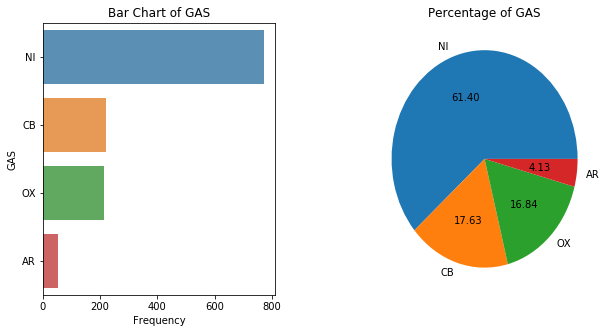

In [111]:
fig_category(data_rmNA, 'GAS', 'Frequency', 'GAS')

* *__MARKET_DOMAIN_DESCR__*

In [ ]:
fig_category(data_rmNA, 'MARKET_DOMAIN_DESCR', 'Frequency', 'MARKET DOMAIN')

* *__TIMESTAMP - MONTH __*

In [ ]:
fig_category(data_rmNA, 'TIMESTAMP - Month', 'Frequency', 'TIMESTAMP - Month')

__ NUMERIC VARIABLES __

In [ ]:
# Function to draw chart for Numeric Variable
def fig_numeric(dt, col_name):
    plt.figure(figsize=(20,8))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    plt.hist(dt[col_name])
    plt.title("Histogram of "+ str(col_name).upper())
    plt.xlabel(col_name.upper())
    plt.ylabel('Frequency')
    plt.subplot(1,2,2)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    sb.boxplot(y= col_name,data=dt)
    plt.title("Boxplot Chart of " + str(col_name).upper())
    plt.ylabel(col_name.upper())

* *__ Sum of Sales_CR __*

In [ ]:
fig_numeric(data_rmNA, 'Sum of Sales_CR')

* *__TIMESTAMP - Year__*

In [ ]:
fig_numeric(data_rmNA, 'TIMESTAMP - Year')

## Step 5: Building Model

### Approach 1: no feature selection and Tunning

#### *Method: Gradient Boosting*

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
features = ["new_GAS", "new_MARKET_DOMAIN_DESCR", "Sum of Sales_CR", "ZIPcode", "TIMESTAMP - Year", "new_TIMESTAMP - Month"]
target = ["MOD_VOLUME_CONSUMPTION"]

In [73]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)

In [79]:
X = training_transformed[features]
y = training_transformed[target]
#print X.dtypes

In [80]:
model.fit(X,y)

D:\Tools\Anacoda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [81]:
X_test = test_transformed[features]

In [85]:
X_test.loc[:,'ZIPcode'] = X_test.loc[:,'ZIPcode'].apply(lambda x : int(x) if not pd.isnull(x) else 0)

In [86]:
X_test.describe()

,new_GAS,new_MARKET_DOMAIN_DESCR,Sum of Sales_CR,ZIPcode,TIMESTAMP - Year,new_TIMESTAMP - Month
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,1.939394,3.702652,0.111349,4541.284091,2017.125000,6.015152
std,0.649128,2.169443,1.148806,2389.482378,0.331033,3.460232
min,0.000000,0.000000,-0.600047,0.000000,2017.000000,1.000000
25%,2.000000,2.000000,-0.548562,1549.000000,2017.000000,4.000000
50%,2.000000,4.000000,-0.445163,5288.000000,2017.000000,6.000000
75%,2.000000,6.000000,0.369085,6370.750000,2017.000000,9.250000
max,3.000000,6.000000,4.276620,7975.000000,2018.000000,11.000000


In [87]:
predicted = model.predict(X_test)

In [88]:
print predicted

[ 5.06394160e+04  6.23848302e+05  8.95367417e+04 -4.46947566e+04
  1.13406782e+05 -8.12280309e+03 -3.29181188e+04  1.50775851e+05
 -1.69761255e+05  1.54275934e+05  3.15981337e+05  1.75626695e+05
  2.95793657e+05 -1.27240277e+05  2.65332424e+05  6.16806418e+04
  1.12880398e+05  1.90899193e+05  1.16542957e+05  1.68522129e+05
  1.68658948e+05  1.72648225e+05  8.45251775e+04  6.88706835e+04
 -8.70577425e+04  4.15269066e+04  7.79464191e+04  7.29967790e+04
  1.27277852e+05  6.07324055e+04  4.80502104e+05  5.52462850e+05
  3.68988879e+05  5.94882992e+05  3.89602854e+05  5.44234079e+05
  5.22379601e+05  3.65412864e+05  3.00437796e+05  3.08368630e+05
  4.77138672e+05  3.07175738e+05  4.05715515e+05  3.92736932e+05
  5.24431019e+05  4.55406143e+05 -2.28147145e+05  1.04567136e+05
  6.21427393e+04  1.08693232e+05  4.99514017e+04  2.41356758e+04
  1.16138919e+05  1.43361181e+05  5.81890414e+05  1.33699127e+06
  1.32770225e+06  1.54840198e+06  1.13256206e+06  1.43694609e+06
  1.72162968e+06  1.09889

In [94]:
result = pd.DataFrame(predicted, columns=["MOD_VOLUME_CONSUMPTION"])

In [95]:
result.head()

,MOD_VOLUME_CONSUMPTION
0,50639.416016
1,623848.301740
2,89536.741736
3,-44694.756575
4,113406.781744


In [101]:
result.to_csv(header = True, path_or_buf="result_GradientBoosting.csv", index = False)
# Public Score : 3470.22748469 

*__Method 2: Linear Regression__*

In [103]:
from sklearn import linear_model

In [104]:
linear = linear_model.LinearRegression()

In [105]:
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
linear.score(X, y)

0.15473950766844635

In [107]:
linear_predicted = linear.predict(X_test)

In [109]:
result_linear = pd.DataFrame(predicted, columns=["MOD_VOLUME_CONSUMPTION"])

In [110]:
result_linear.to_csv(header = True, path_or_buf="result_Linear.csv", index = False)

### Approach 2: apply Feature Selection and Tunning

In [116]:
from hyperopt import hp, fmin, tpe
from hyperopt.pyll import scope

#### Create Objective function

In [122]:
from sklearn.metrics.regression import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

In [123]:
def objective_function_regression(estimator):
    mae_array = cross_val_score( estimator, X, y, cv= 3, n_jobs=-1, scoring = make_scorer(mae) )
    return np.mean(mae_array)

#### Define Search Space and estimators

In [117]:
# hyperopt object for 
scope.define(GradientBoostingRegressor)

sklearn.ensemble.gradient_boosting.GradientBoostingRegressor

In [118]:
# search space
n_estimators  = hp.randint('n_estimators',1000) 
learning_rate = hp.loguniform('learning_rate',-3,1)
max_depth     = hp.randint('max_depth', 10)
max_features =  hp.randint('max_features',X.shape[1]-1)
min_samples_leaf = hp.randint('min_samples_leaf', 10)

In [120]:
# model / estimator to be optimized
est0 = (0.1, scope.GradientBoostingRegressor( n_estimators  = n_estimators + 1,
                                            learning_rate = learning_rate,
                                            max_depth = max_depth + 1,
                                            max_features = max_features + 1,
                                            min_samples_leaf = min_samples_leaf + 1,
                                            random_state=42)) 

In [121]:
# search space
search_space_regression = hp.pchoice('estimator', [est0])

#### Perform Optimization

In [127]:
best = fmin(
    fn= objective_function_regression,
    space= search_space_regression,
    algo = tpe.suggest, # This is the optimization algorithm hyperopt uses, a tree of parzen estimators
    max_evals = 100,
    verbose = 2  # The number of iterations
         )


TypeError: 'generator' object has no attribute '__getitem__'

#### Hyperparameter Tunning (using different way)

In [128]:
from sklearn.grid_search import GridSearchCV

D:\Tools\Anacoda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Tools\Anacoda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [143]:
param_grid = {'learning_rate': [2, 1, 0.5, 0.1, 0.05, 0.02, 0.01],
'max_depth': [3, 4, 5, 6, 7, 8]}

In [144]:
est = GradientBoostingRegressor(n_estimators=3000)

In [145]:
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X, y)

In [146]:
gs_cv.best_params_ # Result : {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 10}

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 10}

In [176]:
model_tunning = GradientBoostingRegressor(n_estimators=100, learning_rate=1.5, max_depth=3, random_state=0)

In [177]:
model_tunning.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.5, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [178]:
predicted_tuning = model_tunning.predict(X_test)

In [181]:
result_tuning = pd.DataFrame(predicted_tuning , columns=["MOD_VOLUME_CONSUMPTION"])

In [180]:
print predicted_tuning

[ 1.33677981e+05  1.62291628e+06  1.02610418e+05 -2.13377486e+03
  1.74981506e+03  1.72131777e+05  1.18914659e+04  5.60722954e+04
 -2.76059976e+05  5.10102327e+05  2.81511297e+05  2.62589631e+05
  2.31259808e+05  7.90102046e+04  2.95975285e+05  8.69356725e+04
  1.64885304e+05  3.11769804e+05  2.14358358e+05  2.48095740e+05
  2.69409578e+05  2.94437700e+05 -4.86511858e+05  8.77249168e+04
 -3.04828404e+04 -2.99069843e+04  6.59212310e+04  1.46651517e+05
  1.12093587e+05  1.05960599e+05  5.00282982e+05  4.88151270e+05
  5.22164285e+05  4.59850374e+05  4.79319723e+05  4.34369681e+05
  4.73778548e+05  4.25002739e+05 -1.23897662e+05  4.23041731e+05
  2.89800072e+05  3.42203926e+05  4.96845328e+05  4.62789544e+05
  4.68580299e+05  6.94592503e+05 -3.87755332e+05  5.44459616e+04
  3.93964126e+04  7.39016960e+04  1.29665774e+05 -4.28102510e+04
 -4.60039746e+04  7.80256038e+03  7.20252823e+05  1.23636974e+06
  1.11554440e+06  1.90173858e+06  1.48174429e+06  1.30313457e+06
  1.69794999e+06  1.83342

In [169]:
print result_tuning

     MOD_VOLUME_CONSUMPTION
0            -447290.288688
1            -447290.288688
2            -447290.288688
3            -447290.288688
4            -447290.288688
5            -447290.288688
6            -447290.288688
7            -447290.288688
8             397691.720224
9             397691.720224
10            397691.720224
11            397691.720224
12            397691.720224
13            397691.720224
14            397691.720224
15            397691.720224
16            334667.550198
17            334667.550198
18            334667.550198
19            334667.550198
20            334667.550198
21            334667.550198
22            287152.843949
23            287152.843949
24            287152.843949
25            287152.843949
26            287152.843949
27            287152.843949
28            287152.843949
29            287152.843949
..                      ...
498           397691.720224
499           397691.720224
500           397691.720224
501           397691

In [182]:
result_tuning.to_csv(header = True, path_or_buf="result_tuning_GradientBoosting3.csv", index = False)